In [2]:
from bs4 import BeautifulSoup
import glob
import pandas as pd
import re
from tqdm.notebook import tqdm

In [2]:
def read_file(fpath):
    
    with open(fpath, 'r') as f:
        text = f.read()

    return text

In [3]:
def make_soup(text):

    soup = BeautifulSoup(text)
    
    return soup

In [20]:
def main():
    
    fpaths = glob.glob("../output/html/*.txt")
    
    for fpath in tqdm(fpaths):
        
        print(fpath)
        
        # Extracts term and date to identify each sessions
        pattern = "../output/html/CRE-(\d)-(\d{4}-\d{2}-\d{2}).txt"        
        matches = re.findall(pattern, fpath)
                
        term = matches[0][0]
        date = matches[0][1]
        
        # Reads the file and prepares soup for the scraping
        text = read_file(fpath)
        soup = make_soup(text)
        
        # Find all the speech contents
        # Initialize a list to store the data
        data = []
        
        # Custom function to find one specific kind of tag
        def td_with_specific_attrs_no_class(tag):
            return (
                tag.name == 'td' and
                tag.get('align') == 'left' and
                tag.get('valign') == 'top' and
                not tag.get('class') and
                not tag.get('colspan') and
                not tag.get('width')
            )

        speeches = soup.find_all(td_with_specific_attrs_no_class)
        
        for speech in speeches:
            
            # The dataframe row
            row = []
            
            # Get the speech text (all ps) and join
            ps = speech.find_all('p')
            text = " ".join([p.get_text().strip() + " " for p in ps])
                        
            # Get the image id, which is the second of all previous siblings
            siblings = speech.find_previous_siblings()
            
            # If there are no siblings, or less than two, this could be another type of bottom table
            # Like information about procedures or other kinds of transcription notes.
            if len(siblings) < 2:
                mep_code = 'no photo – probably not a speech'
            
            # If there are siblings, get parliamentary id from img
            else:
                image_td = siblings[1]
                img = image_td.find('img', alt='MPphoto')

                # Makes sure there's an image there
                if img:
                    mep_code = img['src']

                    # If the photo is generic, store this
                    if 'photo_generic' in mep_code:
                        mep_code = 'generic photo, parse from text'

                    # Otherwise, get the MEP id
                    else:
                        mep_code = re.findall('\d+', mep_code)[0]
                 
                # If there's no image, that's probably proceedings – and not actual speeches
                else:
                    mep_code = 'no photo – probably not a speech'

            # Find the discussion name – it's four indent levels above
            outer_table = speech.parent.parent.parent.parent
            discussion = outer_table.find('td', class_='doc_title').text.strip()
            
            # Try to find the name by going to a span in bold
            speaker = speech.find('span', class_='bold')
            if speaker:
                speaker = speaker.get_text()
            else:
                speaker = None
            
            # Add the data to the row
            row.extend([date, term, text, mep_code, discussion, speaker])
#             print(mep_code, discussion, speaker, sep='|')
            
            # Add rows to the data list
            data.append(row)
        
        # Save as dataframe
        data = pd.DataFrame(data)
        data.to_csv(f"../output/csvs/parsed-{term}-{date}.csv", encoding='utf-32', index=False)


In [21]:
main()

../output/html/CRE-9-2021-12-14.txt
../output/html/CRE-6-2008-10-22.txt
../output/html/CRE-8-2017-05-15.txt
../output/html/CRE-9-2022-05-04.txt
../output/html/CRE-6-2007-06-06.txt
../output/html/CRE-6-2004-11-16.txt
../output/html/CRE-6-2008-09-03.txt
../output/html/CRE-9-2021-02-11.txt
../output/html/CRE-9-2020-03-26.txt
../output/html/CRE-9-2021-05-18.txt
../output/html/CRE-7-2011-10-25.txt
../output/html/CRE-6-2005-09-28.txt
../output/html/CRE-6-2005-07-05.txt
../output/html/CRE-7-2012-05-24.txt
../output/html/CRE-9-2022-10-19.txt
../output/html/CRE-7-2009-11-11.txt
../output/html/CRE-6-2005-02-21.txt
../output/html/CRE-9-2019-12-16.txt
../output/html/CRE-7-2011-05-10.txt
../output/html/CRE-8-2017-07-04.txt
../output/html/CRE-9-2020-11-26.txt
../output/html/CRE-9-2021-10-05.txt
../output/html/CRE-9-2023-01-17.txt
../output/html/CRE-8-2015-11-23.txt
../output/html/CRE-6-2006-02-15.txt
../output/html/CRE-6-2006-02-01.txt
../output/html/CRE-6-2006-02-14.txt
../output/html/CRE-8-2017-09

../output/html/CRE-9-2021-05-20.txt
../output/html/CRE-9-2020-04-17.txt
../output/html/CRE-7-2014-02-06.txt
../output/html/CRE-6-2005-10-25.txt
../output/html/CRE-7-2011-09-28.txt
../output/html/CRE-9-2023-03-16.txt
../output/html/CRE-7-2011-07-05.txt
../output/html/CRE-7-2011-09-14.txt
../output/html/CRE-8-2016-03-07.txt
../output/html/CRE-8-2014-12-15.txt
../output/html/CRE-9-2023-10-19.txt
../output/html/CRE-7-2013-02-05.txt
../output/html/CRE-9-2020-07-09.txt
../output/html/CRE-8-2015-09-09.txt
../output/html/CRE-6-2007-12-10.txt
../output/html/CRE-8-2019-01-31.txt
../output/html/CRE-8-2015-10-14.txt
../output/html/CRE-8-2016-09-15.txt
../output/html/CRE-7-2010-02-25.txt
../output/html/CRE-9-2022-06-22.txt
../output/html/CRE-8-2015-10-28.txt
../output/html/CRE-8-2016-07-04.txt
../output/html/CRE-9-2020-10-05.txt
../output/html/CRE-7-2009-07-16.txt
../output/html/CRE-9-2022-01-17.txt
../output/html/CRE-6-2006-03-22.txt
../output/html/CRE-6-2007-02-15.txt
../output/html/CRE-6-2007-02

../output/html/CRE-7-2009-10-21.txt
../output/html/CRE-8-2016-10-27.txt
../output/html/CRE-6-2009-05-04.txt
../output/html/CRE-9-2021-01-18.txt
../output/html/CRE-6-2008-03-12.txt
../output/html/CRE-7-2013-05-23.txt
../output/html/CRE-6-2008-03-10.txt
../output/html/CRE-7-2013-05-21.txt
../output/html/CRE-8-2015-07-09.txt
../output/html/CRE-8-2016-10-25.txt
../output/html/CRE-9-2021-06-07.txt
../output/html/CRE-6-2009-05-06.txt
../output/html/CRE-9-2024-04-25.txt
../output/html/CRE-6-2005-03-07.txt
../output/html/CRE-9-2021-11-23.txt
../output/html/CRE-7-2010-02-08.txt
../output/html/CRE-8-2014-11-26.txt
../output/html/CRE-7-2009-09-16.txt
../output/html/CRE-8-2017-01-17.txt
../output/html/CRE-7-2013-12-11.txt
../output/html/CRE-9-2023-07-10.txt
../output/html/CRE-8-2015-10-05.txt
../output/html/CRE-6-2006-04-06.txt
../output/html/CRE-8-2017-04-27.txt
../output/html/CRE-8-2016-05-10.txt
../output/html/CRE-8-2015-12-14.txt
../output/html/CRE-8-2016-02-25.txt
../output/html/CRE-6-2007-09

../output/html/CRE-8-2017-04-05.txt
../output/html/CRE-8-2016-05-26.txt
../output/html/CRE-9-2023-02-16.txt
../output/html/CRE-9-2022-03-09.txt
../output/html/CRE-7-2010-09-23.txt
../output/html/CRE-7-2013-10-22.txt
../output/html/CRE-7-2014-03-12.txt
../output/html/CRE-6-2008-01-23.txt
../output/html/CRE-9-2023-12-13.txt
../output/html/CRE-6-2008-06-16.txt
../output/html/CRE-6-2004-07-22.txt
../output/html/CRE-8-2019-03-13.txt
../output/html/CRE-8-2019-03-12.txt
../output/html/CRE-6-2008-06-17.txt
../output/html/CRE-9-2023-12-12.txt
../output/html/CRE-6-2004-10-13.txt
../output/html/CRE-6-2007-09-06.txt
../output/html/CRE-6-2005-11-30.txt
../output/html/CRE-7-2014-03-13.txt
../output/html/CRE-6-2006-06-20.txt
../output/html/CRE-7-2013-10-23.txt
../output/html/CRE-7-2010-09-22.txt
../output/html/CRE-9-2022-03-08.txt
../output/html/CRE-8-2017-04-04.txt
../output/html/CRE-7-2011-01-19.txt
../output/html/CRE-6-2004-12-16.txt
../output/html/CRE-6-2004-12-02.txt
../output/html/CRE-7-2014-01

../output/html/CRE-9-2023-06-14.txt
../output/html/CRE-6-2007-03-28.txt
../output/html/CRE-6-2006-05-16.txt
../output/html/CRE-6-2007-03-14.txt
../output/html/CRE-6-2005-12-12.txt
../output/html/CRE-6-2005-12-13.txt
../output/html/CRE-6-2007-03-15.txt
../output/html/CRE-6-2007-03-29.txt
../output/html/CRE-6-2006-05-17.txt
../output/html/CRE-9-2023-06-15.txt
../output/html/CRE-8-2014-10-23.txt
../output/html/CRE-9-2023-06-01.txt
../output/html/CRE-7-2010-03-25.txt
../output/html/CRE-8-2016-01-19.txt
../output/html/CRE-6-2008-12-04.txt
../output/html/CRE-9-2020-11-11.txt
../output/html/CRE-9-2024-02-29.txt
../output/html/CRE-8-2017-10-03.txt
../output/html/CRE-7-2013-04-18.txt
../output/html/CRE-8-2014-09-16.txt
../output/html/CRE-7-2013-03-11.txt
../output/html/CRE-6-2008-05-20.txt
../output/html/CRE-7-2009-11-26.txt
../output/html/CRE-8-2015-06-24.txt
../output/html/CRE-6-2008-05-08.txt
../output/html/CRE-9-2022-10-06.txt
../output/html/CRE-9-2020-01-14.txt
../output/html/CRE-9-2021-09

In [3]:
# Let's take a look at how many files we have per date
fpaths = glob.glob("../output/csvs/parsed-*.csv")

In [4]:
dates = [re.search(r'\d{4}-\d{2}-\d{2}', fpaths).group() for fpaths in fpaths]

In [5]:
dates = pd.to_datetime(pd.Series(dates))

In [6]:
years = dates.dt.year

<Axes: >

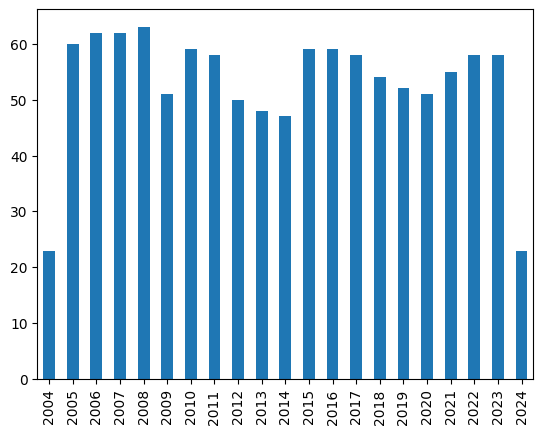

In [7]:
years.groupby(years).count().plot(kind='bar')